In [1]:
import random

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import utils,losses
from tensorflow.keras.datasets import mnist,fashion_mnist,cifar100,cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization,LeakyReLU,Input, Flatten, Dense, Dropout, Lambda, Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adadelta
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import cv2

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
import sys
print("tf2=",tf.__version__)
print("keras=",tf.keras.__version__)
print("cv2=",cv2.__version__)
print("python=",sys.version_info)

tf2= 2.4.1
keras= 2.4.0
cv2= 4.5.1
python= sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)


In [4]:
# the data, split between train and test sets
#tf.keras.datasets.cifar100.load_data(label_mode="fine")
#tf.keras.datasets.cifar100.load_data(label_mode="coarse")

(x_train, y_train_r), (x_test, y_test_r) = cifar100.load_data(label_mode="coarse")
#Guess number of classes
num_classes=max(y_train_r)[0]+1
print("num_classes=",num_classes)
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255
#Color images don't need to do this
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train_n = y_train_r.astype("float32")
y_test_n  = y_test_r.astype("float32")

input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])
#input_shape = x_train.shape[1:]
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train_r, num_classes)
y_test  = utils.to_categorical(y_test_r, num_classes)
print(input_shape)

num_classes= 20
(32, 32, 3)


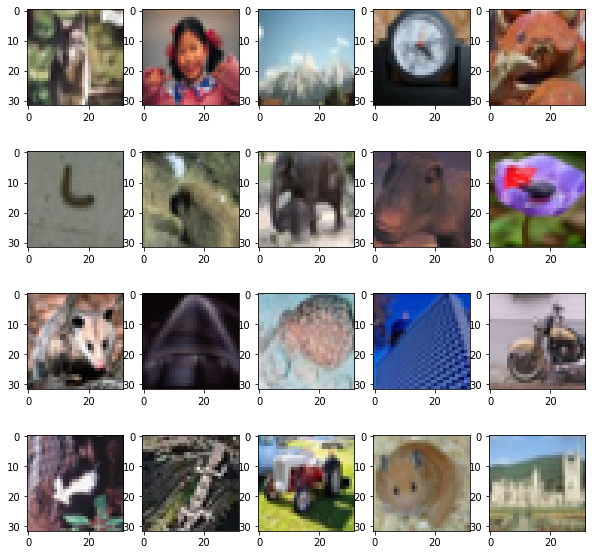

In [5]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4,5,i+1)
    idx=random.randrange(0,x_train.shape[0])
    plt.imshow(x_train[idx,:,:,:])
plt.show()

In [6]:
def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), padding='same')(input)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    #x = Dropout(0.1)(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.5)(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    #x = Dropout(0.1)(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    #x = Dropout(0.1)(x)
    x = Dense(128)(x)
    #for 2D view
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dense(  num_classes,activation="softmax")(x)
    return Model(input, x)

In [7]:
my_cnn=create_base_network(input_shape)
my_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0     

In [8]:
my_cnn.compile(loss=losses.categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [11]:
epochs=1
batch_size=1000
my_cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

50/50 [==============================] - 8s 151ms/step - loss: 3.2346 - accuracy: 0.0786 - val_loss: 3.1953 - val_accuracy: 0.0500
